# Grid World Visualization--Part I
Consider a grid world modeled using a 2D numpy array of dimension of $10\times 10$. There are 10 robots moving in the field. Write a function, named `display_grid` that takes the current locations of all robots as inputs, and displays the locations of all robots. Use appropriate plot to display the locations, and clearly label your plot. Read the documentation of `xlim` and `ylim`, and use them to make sure that the whole grid can be displayed in your plot.

An example of robot locations, i.e., input to the function, is given below:

```py
 location = np.array([[9 8],
                    [8 7],
                    [9 3],
                    [4 3],
                    [3 1],
                    [3 2],
                    [2 7],
                    [4 4],
                    [0 0],
                    [5 4]])
```
Each row of the input array corresponds to an agent. The first column represents the row indices of all agents, and the second column represents the column indices of all agents in the field. An exmaple output is given below:
![Example output](assets/robot_location.png)

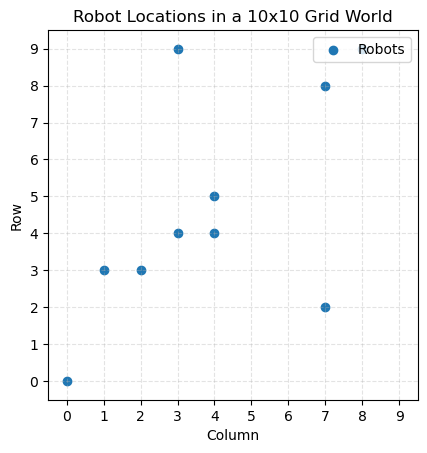

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def display_grid(locations: np.ndarray, n: int = 10, title: str = "Robot Locations in a 10x10 Grid World"):
    """
    locations: (k, 2) array-like, each row = [row, col]
    n: grid size (default 10 -> indices 0..9)
    """
    loc = np.asarray(locations)
    rows = loc[:, 0]
    cols = loc[:, 1]

    fig, ax = plt.subplots()
    ax.scatter(cols, rows, label="Robots")   # x=col, y=row

    # 显示完整网格（0..9），四周留半格边距更好看
    ax.set_xlim(-0.5, n - 0.5)
    ax.set_ylim(-0.5, n - 0.5)
    ax.set_xticks(range(n))
    ax.set_yticks(range(n))
    ax.set_aspect("equal", adjustable="box")

    # 画出格线
    ax.grid(True, which="both", linestyle="--", alpha=0.35)
    ax.set_xlabel("Column")
    ax.set_ylabel("Row")
    ax.set_title(title)
    ax.legend(loc="upper right")
    plt.show()

# 示例（题目给的输入）
location = np.array([
    [9, 8],
    [8, 7],
    [9, 3],
    [4, 3],
    [3, 1],
    [3, 2],
    [2, 7],
    [4, 4],
    [0, 0],
    [5, 4],
])

display_grid(location)


# Grid World Visualization--Part II
Each robot can take one out of four actions: ["up", "down", "left", "right"], indicating the direction towards which the robot will move. If the moving direction will make the robot go outside the boundary of the grid world, then the robot will remain at its current location.

Write a function named `update_location` that takes the current location and action of a robot as inputs, and return its updated location. Feel free to verify your code by plotting the locations of robot before and after taking actions.

In [2]:
import numpy as np

# 单个机器人：按动作走一步（越界则不动）
DIR2DELTA = {
    "up":    (-1, 0),
    "down":  ( 1, 0),
    "left":  ( 0,-1),
    "right": ( 0, 1),
}

def update_location(pos, action: str, n: int = 10) -> np.ndarray:
    """
    pos: 形如 [row, col] 的坐标
    action: "up"|"down"|"left"|"right"
    n: 网格大小（默认 10 -> 合法坐标 0..9）
    返回: 新的 [row, col]
    """
    r, c = int(pos[0]), int(pos[1])
    dr, dc = DIR2DELTA.get(action, (0, 0))  # 未知动作就不动
    nr, nc = r + dr, c + dc

    # 越界检查：越界则保持原位
    if 0 <= nr < n and 0 <= nc < n:
        return np.array([nr, nc], dtype=int)
    else:
        return np.array([r, c], dtype=int)

# 批量版本：对每个机器人应用各自的动作
def step_all(locations: np.ndarray, actions, n: int = 10) -> np.ndarray:
    """
    locations: (k, 2) 的数组，每行 [row, col]
    actions:   长度为 k 的动作列表/数组
    返回:      (k, 2) 的新位置数组
    """
    locations = np.asarray(locations)
    new_locs = locations.copy()
    for i, (pos, act) in enumerate(zip(locations, actions)):
        new_locs[i] = update_location(pos, act, n)
    return new_locs


# Infectious Disease Visualization
Revise your function "simulate_disease" from previous assignment to achieve the following goals. The function should print out the statistic information of the infection probability at the end of prediction horizon, including minimum, maximum, average, and standard deviation.

The function should also plot how the infection probabilities of all individuals evolve over the prediction horizon. Pick appropriate visualization plot and clearly label your plot. You do not need to generate legends for the plot. 


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_disease(
    p0: np.ndarray,            # shape: (N,) 个体的初始感染概率
    horizon: int,              # 预测步数 T
    beta: float = 0.8,         # 传播强度（示例参数）
    gamma: float = 0.3,        # 恢复/衰减强度（示例参数）
    plot: bool = True,
):
    """
    返回: history, shape (T+1, N)，第 t 行是时刻 t 的 N 个体感染概率
    注：把下面的“更新公式”替换成你上次作业使用的模型即可。
    """
    p = np.clip(np.asarray(p0, dtype=float), 0.0, 1.0)
    N = p.size
    history = np.empty((horizon + 1, N), dtype=float)
    history[0] = p

    for t in range(1, horizon + 1):
        # ======== 这里是“示例”的 mean-field 更新公式 ========
        # 新感染 = beta * (1 - p) * 群体平均感染
        # 恢复/衰减 = gamma * p
        p = p + beta * (1.0 - p) * p.mean() - gamma * p
        # ==================================================
        p = np.clip(p, 0.0, 1.0)   # 概率截断在 [0, 1]
        history[t] = p

    # --- 统计信息：使用最后一个时刻的分布 ---
    last = history[-1]
    min_v = float(last.min())
    max_v = float(last.max())
    mean_v = float(last.mean())
    std_v = float(last.std())
    print(f"[t={horizon}] min={min_v:.4f}  max={max_v:.4f}  "
          f"mean={mean_v:.4f}  std={std_v:.4f}")

    # --- 可视化：所有个体轨迹 + 群体平均 ---
    if plot:
        T = np.arange(horizon + 1)
        plt.figure(figsize=(8, 4.8))
        # 所有人：淡色线避免遮挡
        for i in range(N):
            plt.plot(T, history[:, i], lw=1, alpha=0.25)
        # 群体平均：加粗
        plt.plot(T, history.mean(axis=1), lw=2.5, c="k", label="Population mean")
        plt.ylim(0, 1)
        plt.xlim(0, horizon)
        plt.xlabel("Time step")
        plt.ylabel("Infection probability")
        plt.title("Infection probability trajectories")
        plt.grid(True, alpha=0.3)
        # 题目说不强制需要 legend，可以去掉下一行
        # plt.legend()
        plt.show()

    return history


# Image Downsampling
Write a function named `downsample_image`. The function takes a grayscale image and an integer downsampling rate as input and outputs a filtered version of the image. The input image is represented by a 2D numpy array. You can assume the image is of a square shape, and the image size is larger than downsampling rate. To downsample the image, we follow the steps below:
- Partition the image into a collection of smaller blocks. Each block is of dimension $k\times k$, where $k$ is the downsampling rate. If the original image is of dimension $N\times N$, then the rows and columns are partitions into $\frac{N}{k}$ segments, respectively. The output image should then be of dimension $\frac{N}{k}\times \frac{N}{k}$.
- For each block associated with $i$-th row segment, and $j$-th column segment, calculate the average of all pixels within the block, and the average is $(i,j)$-th pixel in output image is assigned as the average. 


Your function should display the downsampled image. An example of the downsampling process is given below:
![downsample process](assets/filter.gif)

The red block in this example is sometimes referred to as a kernel. The kernel in this example is known as a moving average filter. 

Please use this image to test your function. Although this is a colorful image, you can convert it to grayscale using the code below and then pass it to the function:

```py
from PIL import Image
img = Image.open('sample_image_2.jpg').convert('L') # load image in gray scale
img_array = np.array(img) # 8-bit code grayscale
```
See an example of downsampled image with downsampling rate=5:

![downsampled image](assets/dsimg.png)


Revise your function to downsample a colorful image. Note that a colorful image can be represented as a 3D numpy array, where the 3rd dimension represents the RGB channels.

**Extra challenge** (this challenge is not graded): This challenge will test your code efficiency. You need to improve your code to achieve runtime . Please use the following code to test your efficiency:


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
img = Image.open('sample_image_2.jpg').convert('L') # load image in gray scale
img_array = np.array(img) # 8-bit code grayscale

def downsample_image(img: np.array, k: int, show=True):
    
    img = np.asarray(img, dtype=float)
    N = img.shape[0]
    assert img.ndim == 2 and img.shape[0] == img.shape[1], "img 必须是 N×N 灰度图"
    assert N % k == 0, "N 必须能被 k 整除"

    outN = N // k
    out = np.empty((outN, outN), dtype=float)

    for i in range(outN):
        for j in range(outN):
            block = img[i*k:(i+1)*k, j*k:(j+1)*k]
            out[i, j] = block.mean()

    if show:
        plt.figure(figsize=(4,4))
        plt.imshow(out, cmap='gray', vmin=img.min(), vmax=img.max())
        plt.title(f"Downsampled (k={k})")
        plt.axis('off')
        plt.show()

    return out


62.8 ms ± 8.34 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


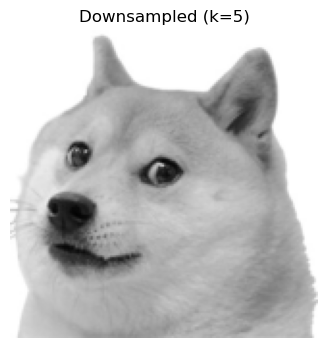

In [14]:
# 先计时
%timeit -n 1 -r 7 downsample_image(img_array, 5, show=False)

# 再真正运行一次把结果留下
img_ds2 = downsample_image(img_array, 5, show=True)


# Word Embedding
LLMs represent words as high dimensional vectors (also known as embeddings). You’ll explore how simple embeddings can capture semantic meanings. Example embeddings of a limited vocabulary are provided below.
- Can you propose a metric to measure the similarity between a pair of words? **Hint**: You have seen a measure in previous assignments.
- Choose an appropriate visualization to show which words are most similar to each other.
- What word do you obtain for `king – man + woman` using vector arithmetic? Does this result make sense to you? Why or why not.

In [18]:
embeddings = {
  "king": [
    1.0, 1.0, 1.0, 0.0, 0.8, 0.9, 0.0, 0.0, 0.0, 0.0
  ] + [0.0]*40,
  "queen": [
    1.0, -1.0, 1.0, 0.0, 0.8, 0.9, 0.0, 0.0, 0.0, 0.0
  ] + [0.0]*40,
  "man": [
    0.0, 1.0, 1.0, 0.0, 0.0, 0.9, 0.0, 0.0, 0.0, 0.0
  ] + [0.0]*40,
  "woman": [
    0.0, -1.0, 1.0, 0.0, 0.0, 0.9, 0.0, 0.0, 0.0, 0.0
  ] + [0.0]*40,
  "apple": [
    0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.7, 0.2, 0.6, 0.2
  ] + [0.0]*40,
  "banana": [
    0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.6, 0.8, 0.6, 0.7
  ] + [0.0]*40
}


In [20]:
import numpy as np

# 1) 把列表转成 numpy 向量
emb_np = {w: np.array(v, dtype=float) for w, v in embeddings.items()}

# 2) 相似度
def cosine_similarity(a, b):
    a = np.asarray(a, dtype=float)
    b = np.asarray(b, dtype=float)
    denom = np.linalg.norm(a) * np.linalg.norm(b)
    return 0.0 if denom == 0 else float(np.dot(a, b) / denom)

# 3) king - man + woman
target_vec = emb_np["king"] - emb_np["man"] + emb_np["woman"]

# 4) 找最相近的词（可排除参与运算的原词）
best_word, best_sim = None, -1.0
for word, vec in emb_np.items():
    if word in {"king", "man", "woman"}:   # 可选：避免被自己“命中”
        continue
    sim = cosine_similarity(target_vec, vec)
    if sim > best_sim:
        best_word, best_sim = word, sim

print("Result:", best_word, "similarity:", best_sim)





Result: queen similarity: 1.0000000000000002
